# Tutorial: Sky Map and Geographic Map Plotting

This notebook demonstrates how to use `gwexpy.plot.SkyMap` for all-sky HEALPix probability maps and `gwexpy.plot.GeoMap` for geographic maps of detector locations.

## 1. SkyMap: All-Sky Probability Maps

`SkyMap` is a specialized plotting class for displaying distributions on the celestial sphere. It integrates with `ligo.skymap` to easily handle HEALPix data.

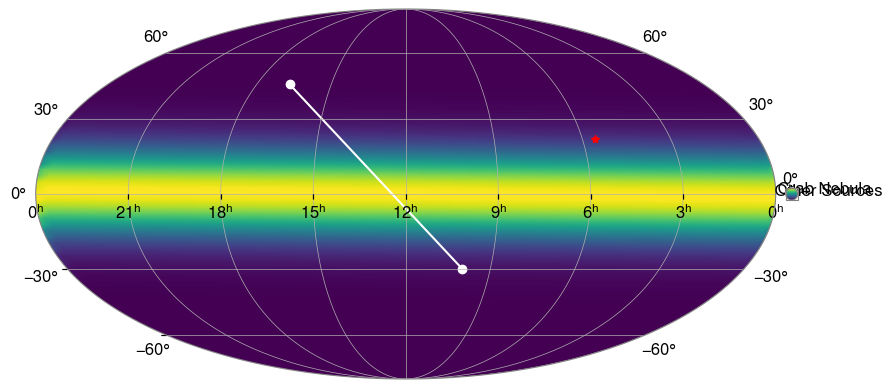

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from gwexpy.plot import SkyMap

# Create SkyMap with Mollweide projection (default)
fig = SkyMap(figsize=(10, 5), projection="astro hours mollweide")

# Add synthetic HEALPix data if ligo.skymap is available
try:
    import ligo.skymap

    _ = ligo.skymap
    nside = 16
    npix = 12 * nside**2
    # Generate a dummy central peak
    map_data = np.exp(-0.5 * (np.arange(npix) - npix // 2) ** 2 / (npix // 10) ** 2)
    fig.add_healpix(map_data, cmap="viridis")
except ImportError:
    print("ligo.skymap not installed.")

# Mark some astronomical targets
# Crab Nebula (RA: 83.63 deg, Dec: 22.01 deg)
fig.mark_target(83.63, 22.01, label="Crab Nebula", color="red", marker="*")

# Other targets
fig.mark_target([150, 250], [-30, 45], label="Other Sources", color="white", marker="o")

plt.show()

## 2. GeoMap: Geographic Maps with PyGMT

`GeoMap` provides a Cartopy-like interface to `PyGMT`, allowing for high-quality geographic maps and easy placement of gravitational wave detectors.

In [2]:
from gwexpy.plot import GeoMap

# Create GeoMap with Robinson projection centered on 135E (Japan)
try:
    gmap = GeoMap(projection="Robinson", center_lon=135)

    # Add map features
    gmap.add_coastlines(resolution="low", color="black")
    gmap.fill_continents(color="wheat")
    gmap.fill_oceans(color="lightblue")

    # Plot standard detectors (KAGRA, LIGO, Virgo, GEO)
    for det in ["K1", "H1", "L1", "V1", "G1"]:
        gmap.plot_detector(det, label=True)

    # Plot an arbitrary point
    gmap.plot(x=170.5, y=-23.6, marker="o", color="purple", markersize=12)

    gmap.show()
except ImportError as e:
    print(e)
except Exception as e:
    print(f"An error occurred: {e}")

pygmt is required for GeoMap. Install with: pip install pygmt (details: No module named 'pygmt')


## 3. Close-up View of Japan Region

In `GeoMap`, you can automatically zoom in to a specific country region by specifying an ISO 3166-1 alpha-2 country code (such as 'JP', 'US', etc.) in the `region` argument.
You can also add a scale bar to the map using `add_scale_bar()`.

In [3]:
try:
    from gwexpy.plot import GeoMap

    # Display Japan region (specify region='JP')
    # Use Mercator projection for zoomed view, with detailed frame annotations (frame='afg')
    geo_jp = GeoMap(projection="Mercator", region="JP", frame="afg")

    geo_jp.fill_oceans(color="azure")
    geo_jp.fill_continents(color="lightgray")
    geo_jp.add_coastlines(resolution="medium")  # Draw coastlines with higher resolution

    # Plot KAGRA detector
    geo_jp.plot_detector("K1")

    # Add scale bar (500km width, at bottom-left with 0.5cm offset)
    geo_jp.add_scale_bar(width="500k", position="jBL", offset="0.5c/0.5c")

    geo_jp.show()
except ImportError as e:
    print(e)
except Exception as e:
    print(f"An error occurred: {e}")


pygmt is required for GeoMap. Install with: pip install pygmt (details: No module named 'pygmt')


### Commonly Used ISO Country Codes (alpha-2)

| Country | ISO Code | Notes |
| :--- | :--- | :--- |
| Japan | `JP` | Location of KAGRA |
| United States | `US` | Location of LIGO (Hanford, Livingston) |
| Italy | `IT` | Location of Virgo |
| Germany | `DE` | Location of GEO600 |
| India | `IN` | LIGO-India under construction |
| Australia | `AU` | |
| United Kingdom | `GB` | |